# 2.1 Unsupervised Machine Learning_Clsuters

### Importing libraries and Data.
### Data Wrangling and Scaling.
### Perfom Hierarchical Clustering.
### Principal Component Analysis (PCA).

In [330]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [331]:
# Ensures the charts created are displayed in the notebook without the need to "call" them.
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

# Supress scientific notation for easier analysis profiling
pd.set_option('display.float_format', '{:.2f}'.format)

pd.set_option('display.max_columns', None)

In [332]:
#Create a path to where your data is stored.
path = r'C:\Users\IVON6\ClimateWins'

In [333]:
#Read in the European weather data and Answers Data set.

climate = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
answers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Weather_Prediction_Pleasant_Weather.csv'))

In [334]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.10,0.85,1.02,0.32,0.09,0,0.70,6.50,0.80,10.90,1,0.81,1.02,0.88,0.00,7.00,3.70,-0.90,7.90,4,0.67,1.02,0.44,0.01,2.30,2.40,-0.40,5.10,7,7.70,0.85,1.00,0.07,0.25,0.00,9.30,7.40,11.00,8,5.40,0.83,1.02,0.12,0.08,0,0.00,10.00,7.00,11.50,8,0.91,0.00,0,0.80,-0.30,1.60,7,0.91,1.00,0.13,0.22,0,0.00,10.60,9.40,8.30,2.90,0.82,1.01,0.28,0.48,1.60,7.90,3.90,9.40,8,1.40,1.00,1.02,0.20,0.00,0.00,-0.60,-1.90,0.50,7,8.70,0.83,1.01,0.22,0.32,1.00,9.50,8.50,11.10,6,0.00,0.92,1.03,0.53,0.00,1.40,7.60,4.40,10.80,5,0.67,0.20,0.10,0,0.00,6.90,1.10,10.40,8,4.00,0.98,1.00,0.04,1.14,0,0.00,4.90,3.80,5.90,3,2.60,0.73,1.02,7.10,7.80,4,4.50,0.73,1.03,0.48,0.01,2.30,-5.90,-8.50,-3.20,5,1.01,0.05,0.32,0.00,4.20,2.20,4.90,3.80,0.76,1.02,1.54,0.44,10.00,7.80,12.20,5,0.88,1.00,0.45,0

In [335]:
climate.tail()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
22945,20221027,10,1,2.10,0.79,1.02,1.34,0.22,0,7.70,15.90,11.40,21.40,2,0.68,1.03,1.57,0.18,5.70,18.20,12.10,24.40,4,0.67,1.02,1.41,0.14,5.40,11.70,7.90,16.20,8,3.00,0.84,1.02,1.13,0.22,2.80,15.70,12.80,19.40,8,6.00,0.75,1.02,1.13,0.20,0,6.40,17.80,13.60,21.40,6,0.70,0.12,0,11.50,8.00,15.00,5,0.87,1.01,1.18,0.16,0,1.90,16.40,11.90,18.90,2.40,0.77,1.02,1.14,0.19,4.00,9.10,5.40,13.10,4,0.10,0.80,1.03,1.35,0.37,5.90,14.70,12.10,21.10,8,3.80,0.67,1.02,1.17,0.20,5.30,18.60,14.10,22.60,8,1.70,0.52,1.02,1.89,0.12,5.30,20.00,16.20,23.90,2,0.76,1.37,0.26,0,9.70,14.30,8.30,22.20,8,1.10,0.98,1.01,1.06,0.21,0,0.10,9.70,5.80,12.00,3,1.00,0.73,1.02,7.10,15.40,2,5.70,0.84,1.03,1.56,0.47,4.70,0.60,-1.40,2.60,5,1.02,1.11,0.14,3.20,11.50,8.20,14.20,3.70,0.00,1.02,1.54,0.18,19.90,14.2

In [336]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [337]:
answers.tail()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22949,20221031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Data Wrangling and Scaling

In [339]:

# Extracting data for the 2022
climate['DATE'] = pd.to_datetime(climate['DATE'], format='%Y%m%d')
weather_2022 = climate[climate['DATE'].dt.year == 2022]

# Drop unnecessary columns like DATE and MONTH for the clustering task
weather_2022_filtered = weather_2022.drop(columns=['DATE', 'MONTH'])

In [340]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
scaled_weather_2022 = scaler.fit_transform(weather_2022_filtered)

# Convert back to DataFrame for easy readability
scaled_weather_df2022 = pd.DataFrame(scaled_weather_2022, columns=weather_2022_filtered.columns)


In [341]:
scaled_weather_df2022.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.54,0.00,1.30,1.19,-1.25,-0.39,-0.08,-0.42,-1.06,-0.89,-0.95,-0.02,0.00,0.73,-0.27,-0.37,-1.23,-0.73,-0.75,-0.68,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,1.04,0.58,1.16,0.30,-1.49,-0.36,-1.13,-0.06,0.71,-0.63,0.75,0.70,0.88,0.58,-1.51,-0.35,0.00,-1.21,-0.11,0.51,-0.47,-0.31,1.75,-0.35,3.75,-0.77,-0.48,-0.78,1.04,1.12,-0.09,-1.49,-0.01,0.00,-1.08,0.01,0.56,-0.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,-0.69,1.81,1.27,-1.11,-0.46,-0.76,-1.45,-1.30,-1.42,0.99,0.57,0.70,0.53,-1.31,-0.48,-0.35,-0.14,0.43,-0.42,0.45,-1.14,0.39,1.83,-1.26,-0.31,-0.08,-0.91,-1.05,-0.78,-0.08,0.50,-1.16,-0.49,-0.14,0.13,-0.57,-0.72,-0.54,0.34,-1.42,1.60,0.22,-1.48,1.34,1.78,-1.19,-1.68,-1.42,-2.03,0.00,-1.34,-0.00,0.00,-0.00,0.00,-1.29,1.98,-0.00,0.00,0.58,-0.35,-1.12,0.14,0.07,0.20,

In [342]:
scaled_weather_df2022.shape

(304, 168)

In [343]:
# Drop unnecessary columns like DATE and MONTH for the clustering task
climatedrop = climate.drop(columns=['DATE', 'MONTH'])

In [344]:
# Copy columns headers from original temp dataset, pasting to this scaled data set

columns=climatedrop.columns.values.tolist() #create a list of column names for your df

columns #list the columns

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

In [345]:
scaled_weather_df2022.columns = columns

In [346]:
scaled_weather_df2022.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.54,0.00,1.30,1.19,-1.25,-0.39,-0.08,-0.42,-1.06,-0.89,-0.95,-0.02,0.00,0.73,-0.27,-0.37,-1.23,-0.73,-0.75,-0.68,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,1.04,0.58,1.16,0.30,-1.49,-0.36,-1.13,-0.06,0.71,-0.63,0.75,0.70,0.88,0.58,-1.51,-0.35,0.00,-1.21,-0.11,0.51,-0.47,-0.31,1.75,-0.35,3.75,-0.77,-0.48,-0.78,1.04,1.12,-0.09,-1.49,-0.01,0.00,-1.08,0.01,0.56,-0.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,-0.69,1.81,1.27,-1.11,-0.46,-0.76,-1.45,-1.30,-1.42,0.99,0.57,0.70,0.53,-1.31,-0.48,-0.35,-0.14,0.43,-0.42,0.45,-1.14,0.39,1.83,-1.26,-0.31,-0.08,-0.91,-1.05,-0.78,-0.08,0.50,-1.16,-0.49,-0.14,0.13,-0.57,-0.72,-0.54,0.34,-1.42,1.60,0.22,-1.48,1.34,1.78,-1.19,-1.68,-1.42,-2.03,0.00,-1.34,-0.00,0.00,-0.00,0.00,-1.29,1.98,-0.00,0.00,0.58,-0.35,-1.12,0.14,0.07,0.20,

## Principal Component Analysis (PCA)

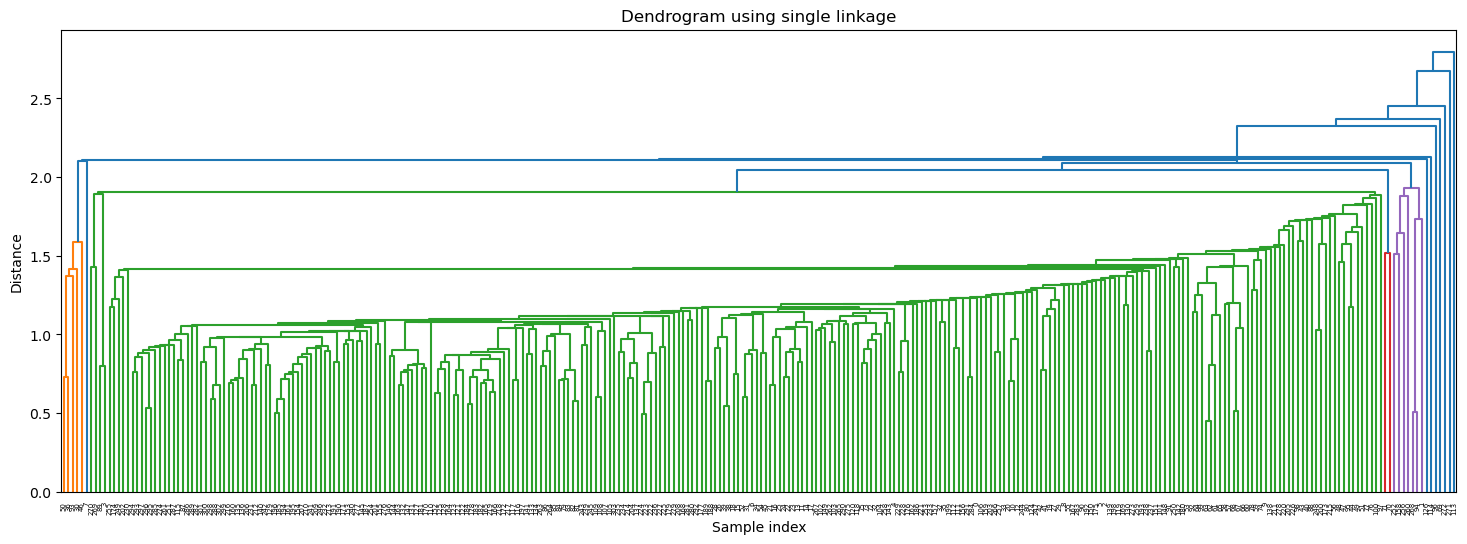

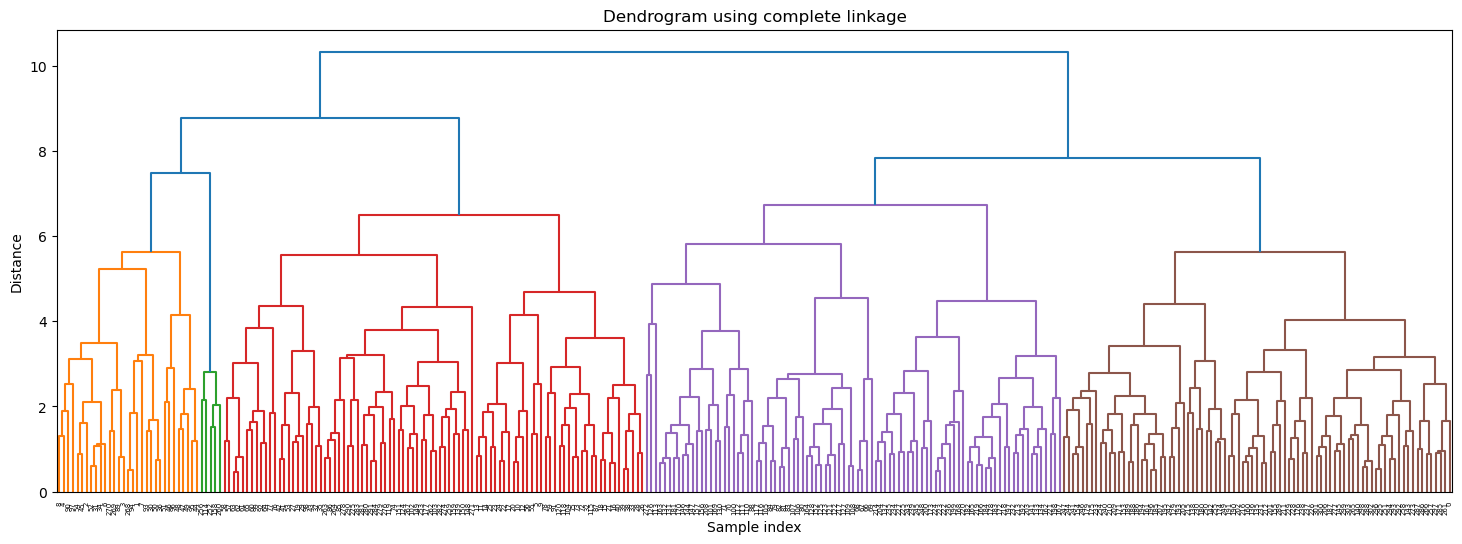

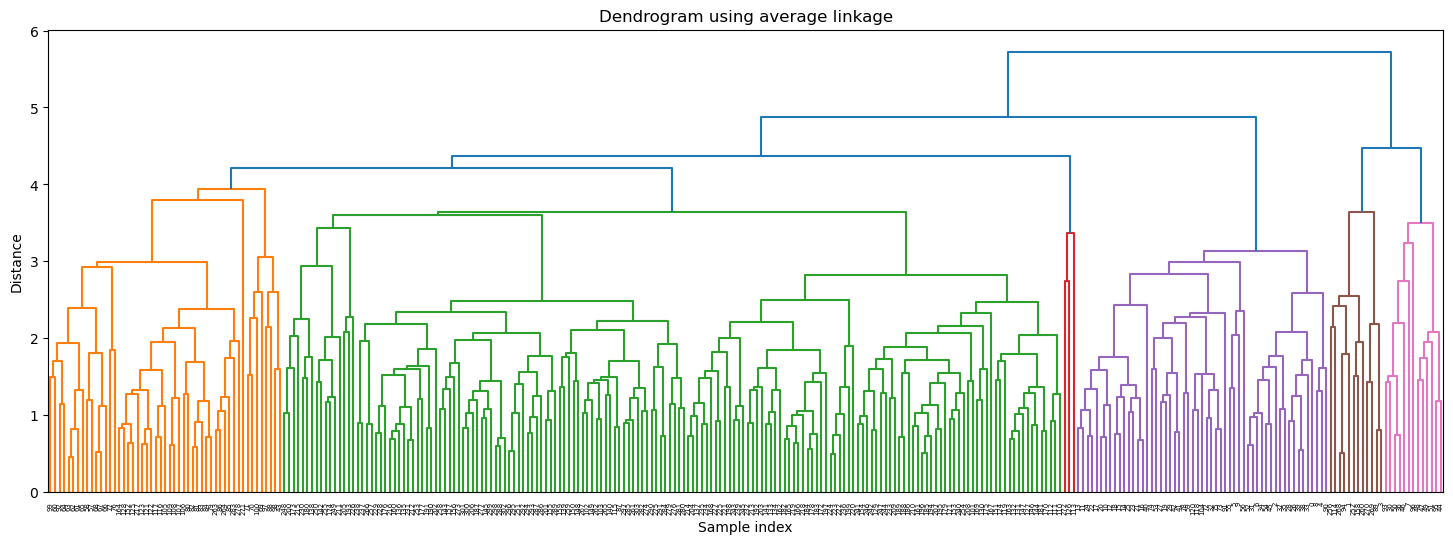

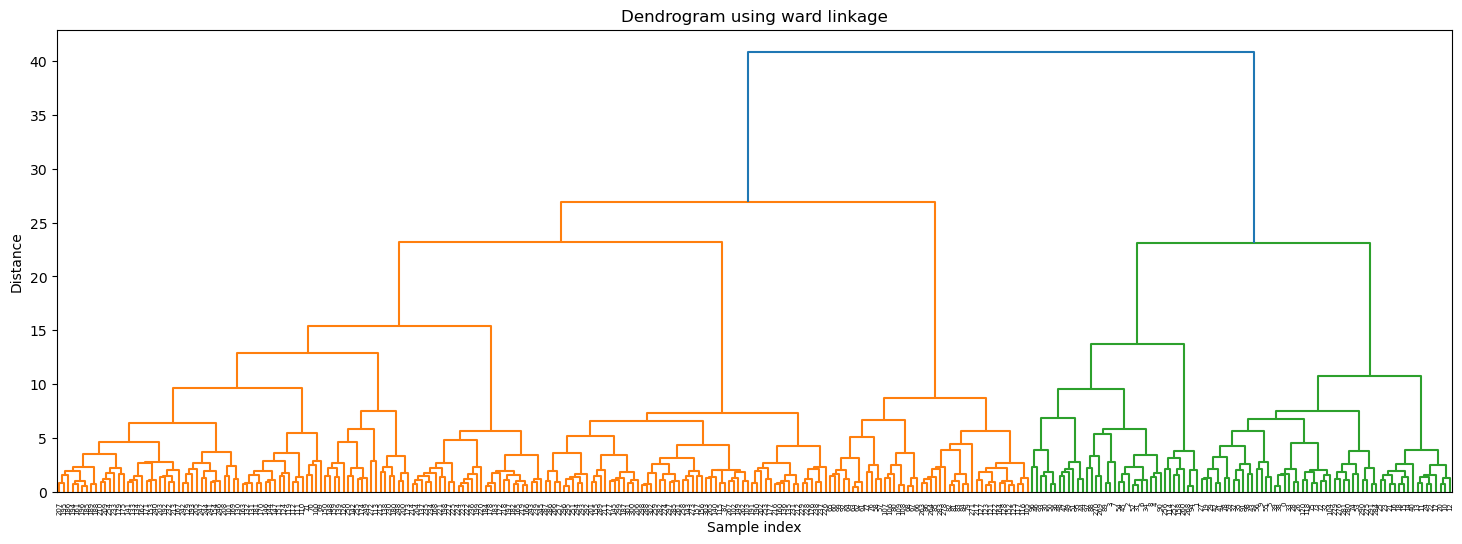

In [348]:
#Compare only DUSSELDORF and BUDAPEST in 2022 

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Methods to use for linkage
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    # Perform the linkage
    linked = linkage(scaled_weather_df2022.loc[:,
['DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',]],method=method)
    
    # Plot dendrogram
    plt.figure(figsize=(18,6))
    dendrogram(linked, orientation='top', distance_sort='descending', leaf_rotation=90, show_leaf_counts=True)
    plt.title(f'Dendrogram using {method} linkage')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

In [349]:
cols= ['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_radiation',
 'DUSSELDORF_precipitation',
 'DUSSELDORF_snow_depth',
 'DUSSELDORF_sunshine',
 'DUSSELDORF_temp_mean',
 'DUSSELDORF_temp_min',
 'DUSSELDORF_temp_max',
 'GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_snow_depth',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'LJUBLJANA_cloud_cover',
 'LJUBLJANA_wind_speed',
 'LJUBLJANA_humidity',
 'LJUBLJANA_pressure',
 'LJUBLJANA_global_radiation',
 'LJUBLJANA_precipitation',
 'LJUBLJANA_sunshine',
 'LJUBLJANA_temp_mean',
 'LJUBLJANA_temp_min',
 'LJUBLJANA_temp_max',
 'MAASTRICHT_cloud_cover',
 'MAASTRICHT_wind_speed',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max',
 'MADRID_cloud_cover',
 'MADRID_wind_speed',
 'MADRID_humidity',
 'MADRID_pressure',
 'MADRID_global_radiation',
 'MADRID_precipitation',
 'MADRID_sunshine',
 'MADRID_temp_mean',
 'MADRID_temp_min',
 'MADRID_temp_max',
 'MUNCHENB_cloud_cover',
 'MUNCHENB_humidity',
 'MUNCHENB_global_radiation',
 'MUNCHENB_precipitation',
 'MUNCHENB_snow_depth',
 'MUNCHENB_sunshine',
 'MUNCHENB_temp_mean',
 'MUNCHENB_temp_min',
 'MUNCHENB_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']
df_weather_reduced= scaled_weather_df2022[cols]
df_weather_reduced

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0.54,0.00,1.30,1.19,-1.25,-0.39,-0.08,-0.42,-1.06,-0.89,-0.95,-0.02,0.00,0.73,-0.27,-0.37,-1.23,-0.73,-0.75,-0.68,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,1.04,0.58,1.16,0.30,-1.49,-0.36,-1.13,-0.06,0.71,-0.63,0.75,0.70,0.88,0.58,-1.51,-0.35,0.00,-1.21,-0.11,0.51,-0.47,-0.31,1.75,-0.35,3.75,-0.77,-0.48,-0.78,1.04,1.12,-0.09,-1.49,-0.01,0.00,-1.08,0.01,0.56,-0.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,-0.69,1.81,1.27,-1.11,-0.46,-0.76,-1.45,-1.30,-1.42,0.99,0.57,0.70,0.53,-1.31,-0.48,-0.35,-0.14,0.43,-0.42,0.45,-1.14,0.39,1.83,-1.26,-0.31,-0.08,-0.91,-1.05,-0.78,-0.08,0.50,-1.16,-0.49,-0.14,0.13,-0.57,-0.72,-0.54,0.34,-1.42,1.60,0.22,-1.48,1.34,1.78,-1.19,-1.68,-1.42,-2.03,0.00,-1.34,-0.00,0.00,-0.00,0.00,-1.29,1.98,-0.00,0.00,0.58,-0.35,-1.12,0.14,0.07,0.20,

In [350]:
from sklearn.decomposition import PCA

# Reducing the data to the number of weather stations (for example, 9 stations)
pca = PCA(n_components=9)
pca_weather_data = pca.fit_transform(df_weather_reduced)





In [351]:
pca_weather_data

array([[-7.45011973e+00, -1.82114475e+00, -4.57666805e+00, ...,
         1.53443507e-01, -3.63370226e-01,  5.59609385e-01],
       [-7.67406584e+00, -4.91838642e+00, -1.85940659e+00, ...,
        -1.69430595e+00, -9.16500880e-01,  2.71422623e+00],
       [-7.72901986e+00, -6.39160283e+00,  9.79244185e-02, ...,
        -2.26333778e+00, -1.00477954e-03,  1.96801262e+00],
       ...,
       [ 1.37994773e+00, -2.62716077e+00, -3.43965127e+00, ...,
        -1.46516207e+00, -7.75487160e-02,  7.61460395e-01],
       [-9.56410292e-02, -1.99324221e+00, -3.46510061e+00, ...,
        -9.74737312e-01,  7.06693089e-01,  7.19793904e-01],
       [-1.50061207e+00, -3.30132773e+00, -2.72284104e+00, ...,
        -1.35866167e+00,  1.03297676e+00, -3.69444299e-01]])

In [352]:
#Make a dataframe of the new components
pca_weather_components_df = pd.DataFrame(pca_weather_data, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9'])

In [353]:
pca_weather_components_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67
...,...,...,...,...,...,...,...,...,...
299,0.79,-2.01,-3.94,-3.64,-2.41,-1.11,-1.88,0.16,0.33
300,1.15,-2.68,-3.82,-3.04,-2.54,-0.64,-2.77,1.10,0.42
301,1.38,-2.63,-3.44,-2.43,-2.52,0.64,-1.47,-0.08,0.76
302,-0.10,-1.99,-3.47,-2.44,-3.55,0.20,-0.97,0.71,0.72


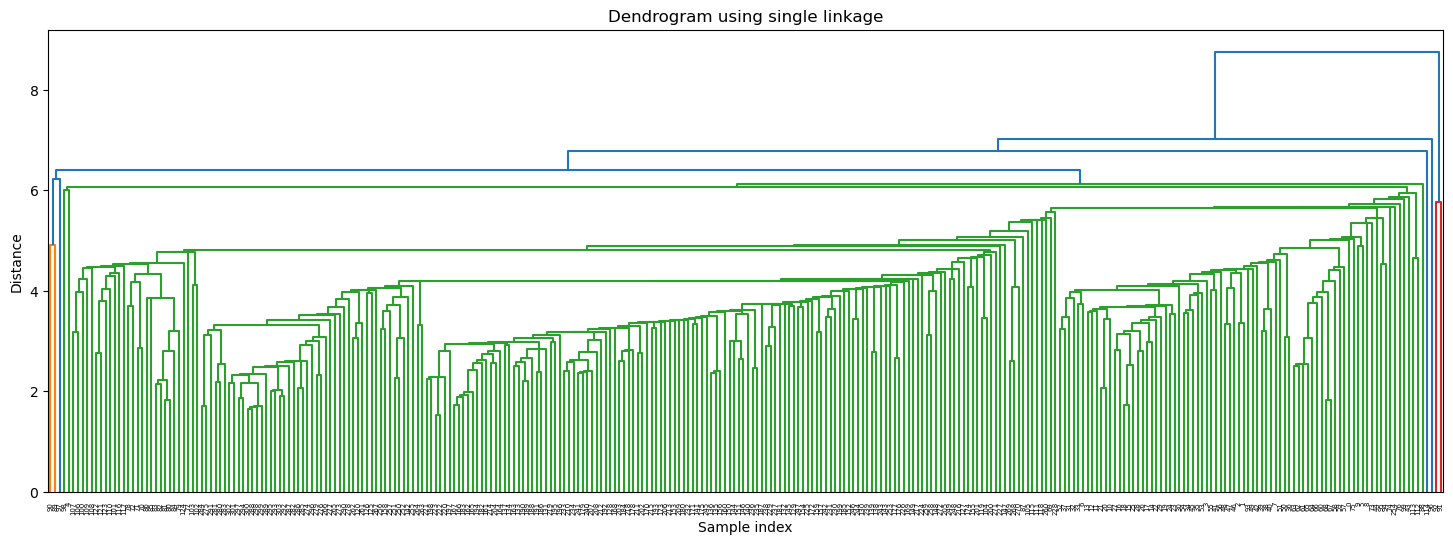

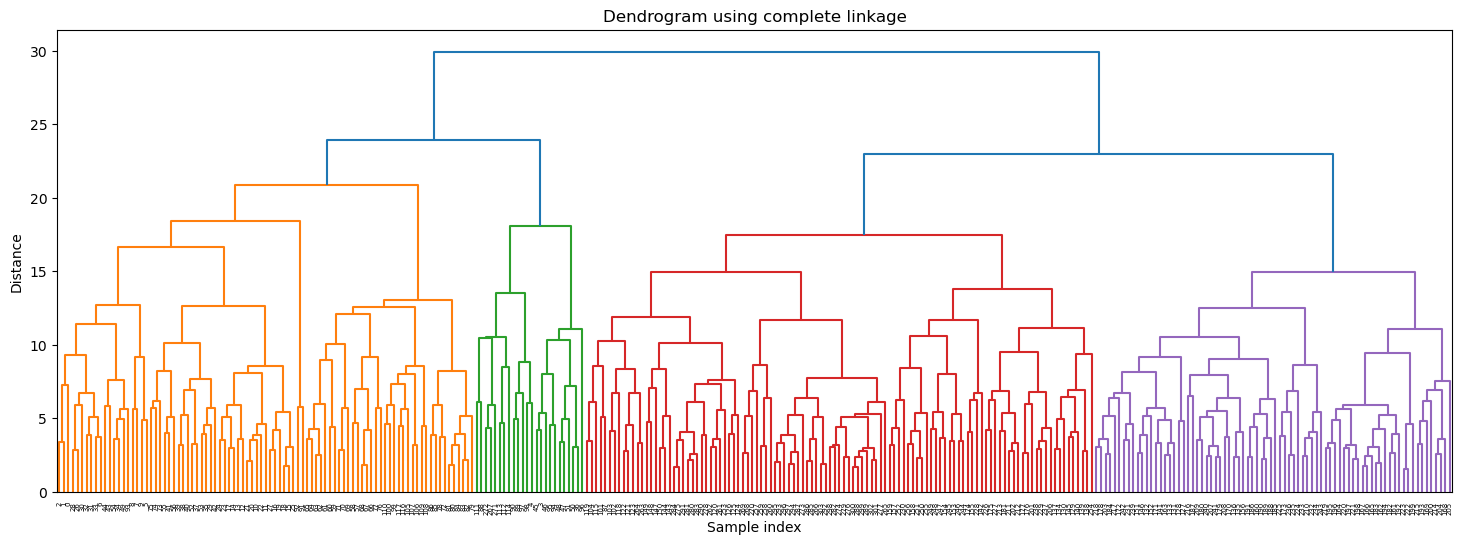

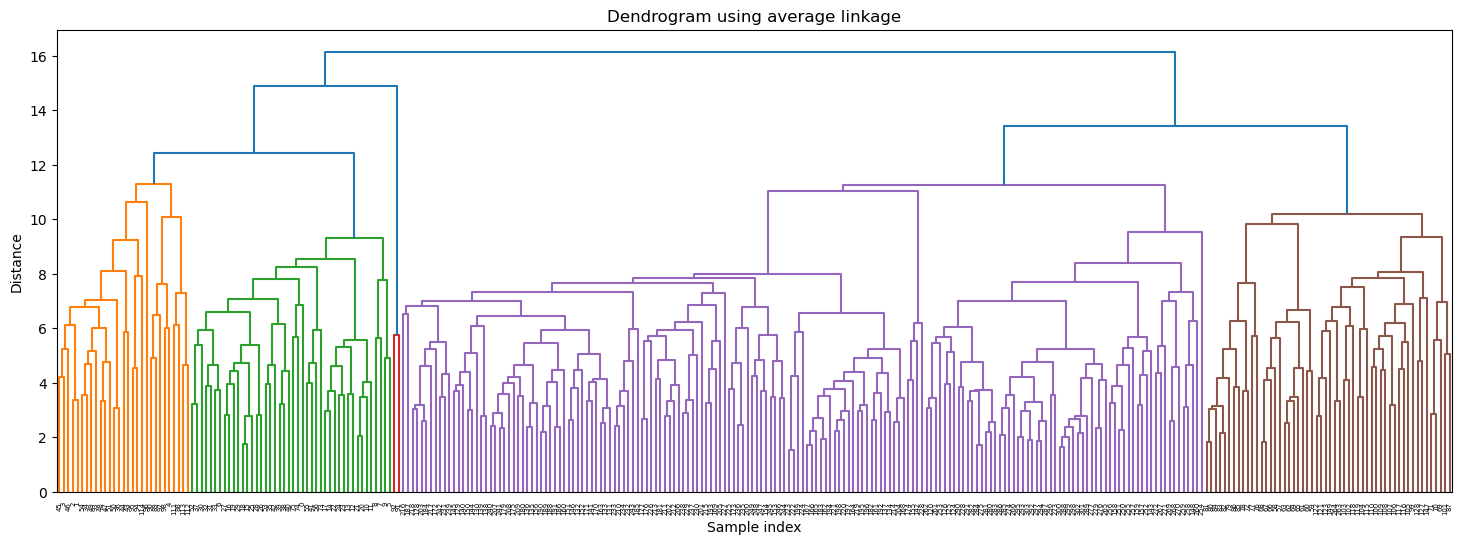

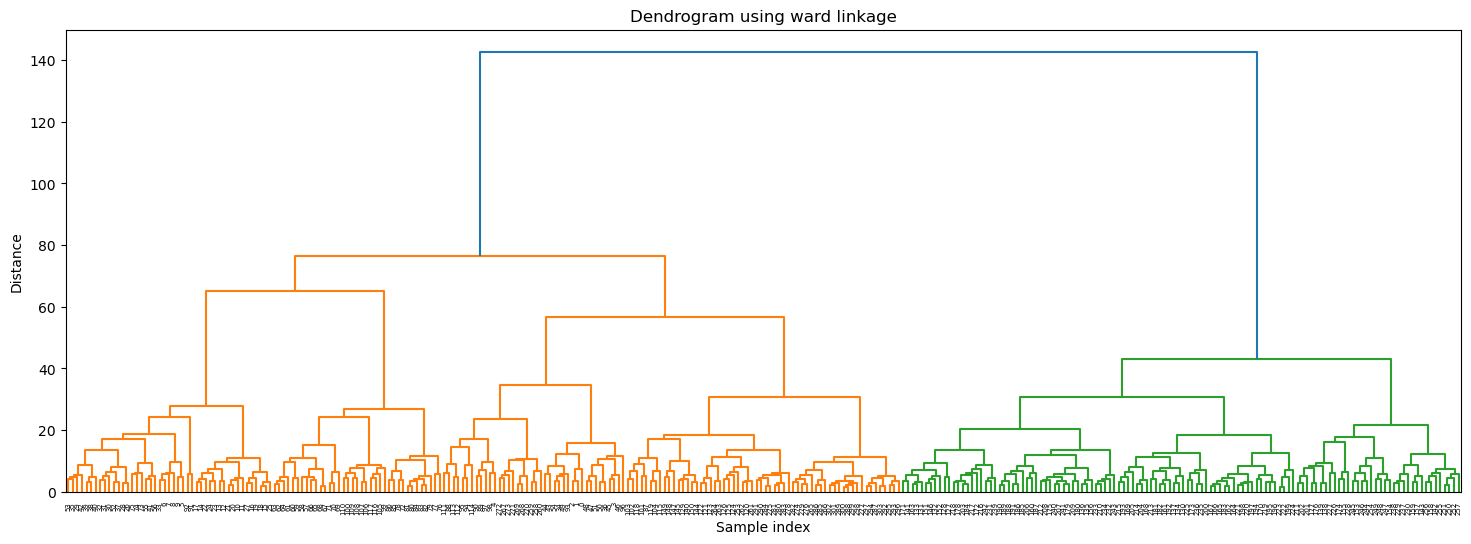

In [354]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Methods to use for linkage
linkage_methods = ['single', 'complete', 'average', 'ward']

for method in linkage_methods:
    # Perform the linkage
    linked = linkage(pca_weather_components_df.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method=method)
    
    # Plot dendrogram
    plt.figure(figsize=(18,6))
    dendrogram(linked, orientation='top', distance_sort='descending', leaf_rotation=90, show_leaf_counts=True)
    plt.title(f'Dendrogram using {method} linkage')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

In [355]:
# Export the reduced dataset to a CSV
pca_weather_components_df.to_csv(os.path.join(path, '02 Data', 'Prepared data', 'pca_weather_components_data.csv'), index=False)

In [356]:
linked = linkage(pca_weather_components_df.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="ward")
    

# LJUBLJANA_pleasant_weather Cluster

In [358]:
# # Creating 2 Clusters
df_plot=pca_weather_components_df.copy()

df_plot['clust2']=fcluster(linked,2, criterion='maxclust')
df_plot.head()


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,clust2
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56,2
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71,2
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97,2
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07,2
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67,2


In [359]:
# create label
df_plot["label"] = answers["LJUBLJANA_pleasant_weather"]
df_plot.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,clust2,label
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56,2,0
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71,2,0
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97,2,0
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07,2,0
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67,2,0


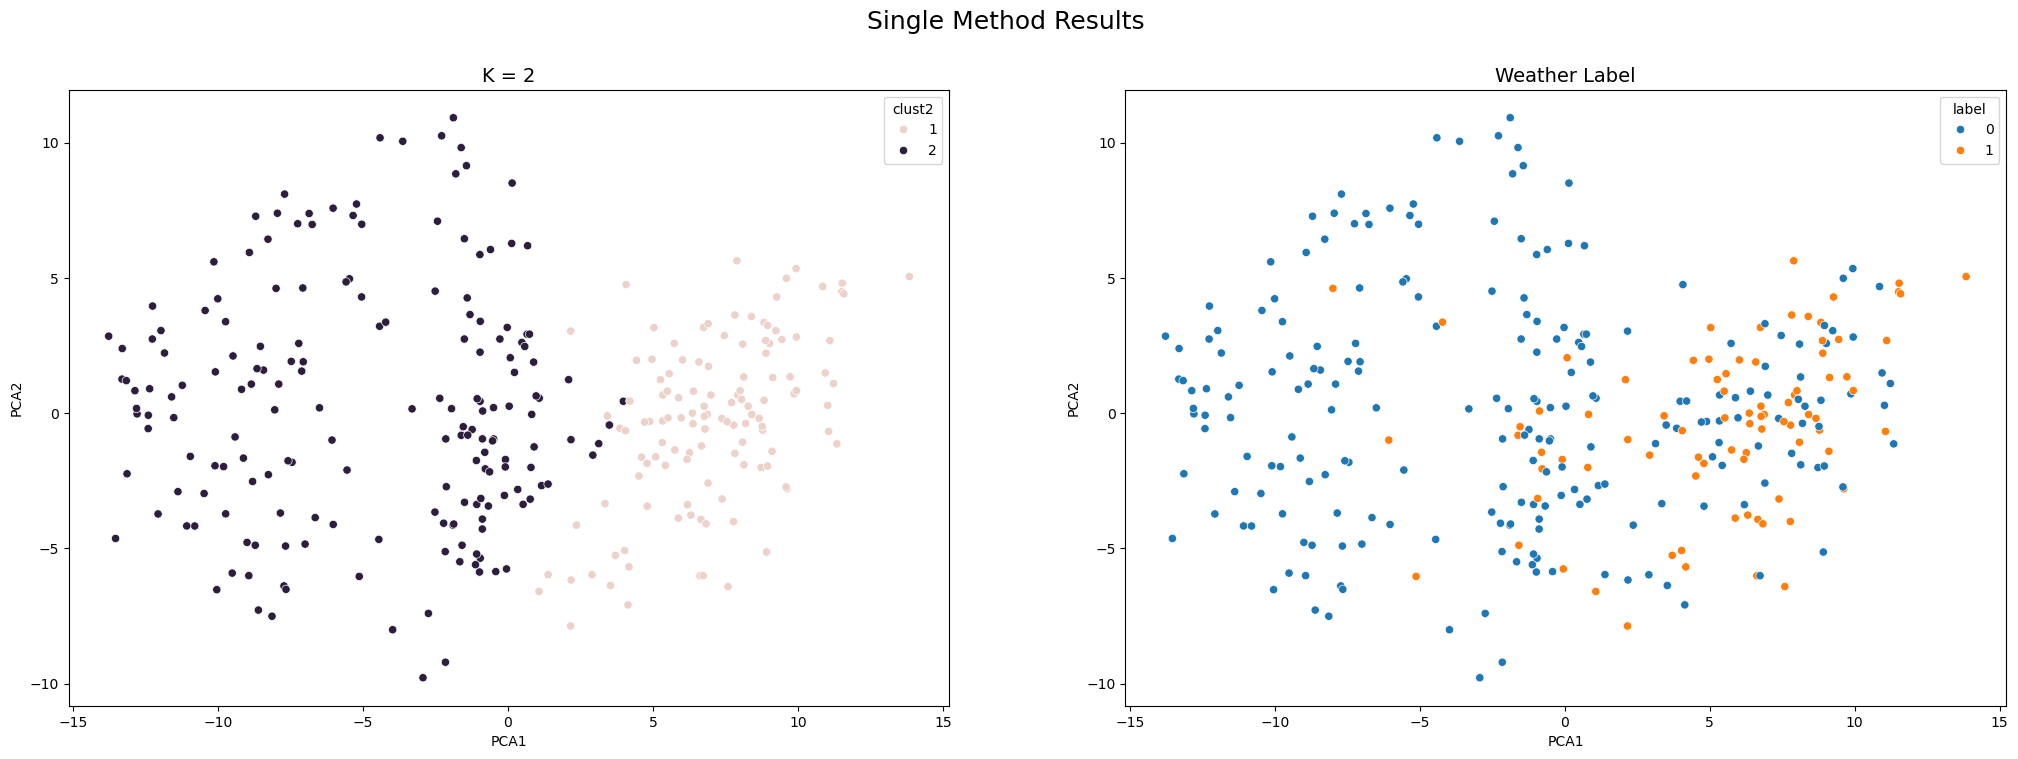

In [360]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Single Method Results",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=df_plot, hue="clust2")

plt.subplot(1,2,2)
plt.title("Weather Label",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=df_plot, hue="label")

plt.show()

In [361]:
df_plot["adjusted_cluster"] = df_plot["clust2"].replace({2:0})

df_plot

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,clust2,label,adjusted_cluster
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56,2,0,0
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71,2,0,0
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97,2,0,0
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07,2,0,0
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.79,-2.01,-3.94,-3.64,-2.41,-1.11,-1.88,0.16,0.33,2,1,0
300,1.15,-2.68,-3.82,-3.04,-2.54,-0.64,-2.77,1.10,0.42,2,0,0
301,1.38,-2.63,-3.44,-2.43,-2.52,0.64,-1.47,-0.08,0.76,2,0,0
302,-0.10,-1.99,-3.47,-2.44,-3.55,0.20,-0.97,0.71,0.72,2,0,0


In [362]:
# Getting the accuracy
df_plot["accuracy"] = df_plot["label"] == df_plot["adjusted_cluster"]

df_plot

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,clust2,label,adjusted_cluster,accuracy
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56,2,0,0,True
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71,2,0,0,True
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97,2,0,0,True
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07,2,0,0,True
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67,2,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.79,-2.01,-3.94,-3.64,-2.41,-1.11,-1.88,0.16,0.33,2,1,0,False
300,1.15,-2.68,-3.82,-3.04,-2.54,-0.64,-2.77,1.10,0.42,2,0,0,True
301,1.38,-2.63,-3.44,-2.43,-2.52,0.64,-1.47,-0.08,0.76,2,0,0,True
302,-0.10,-1.99,-3.47,-2.44,-3.55,0.20,-0.97,0.71,0.72,2,0,0,True


In [363]:
df_plot["accuracy"].sum()/len(df_plot)

0.7467105263157895

# MADRID_pleasant_weather cluster

In [365]:
# Creating 2 Clusters
df_plot1=pca_weather_components_df.copy()

df_plot1['clust2']=fcluster(linked,2, criterion='maxclust')
df_plot1.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,clust2
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56,2
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71,2
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97,2
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07,2
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67,2


In [366]:
#Creatin label
df_plot1["label"] = answers["MADRID_pleasant_weather"]
df_plot1.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,clust2,label
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56,2,0
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71,2,0
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97,2,0
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07,2,0
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67,2,0


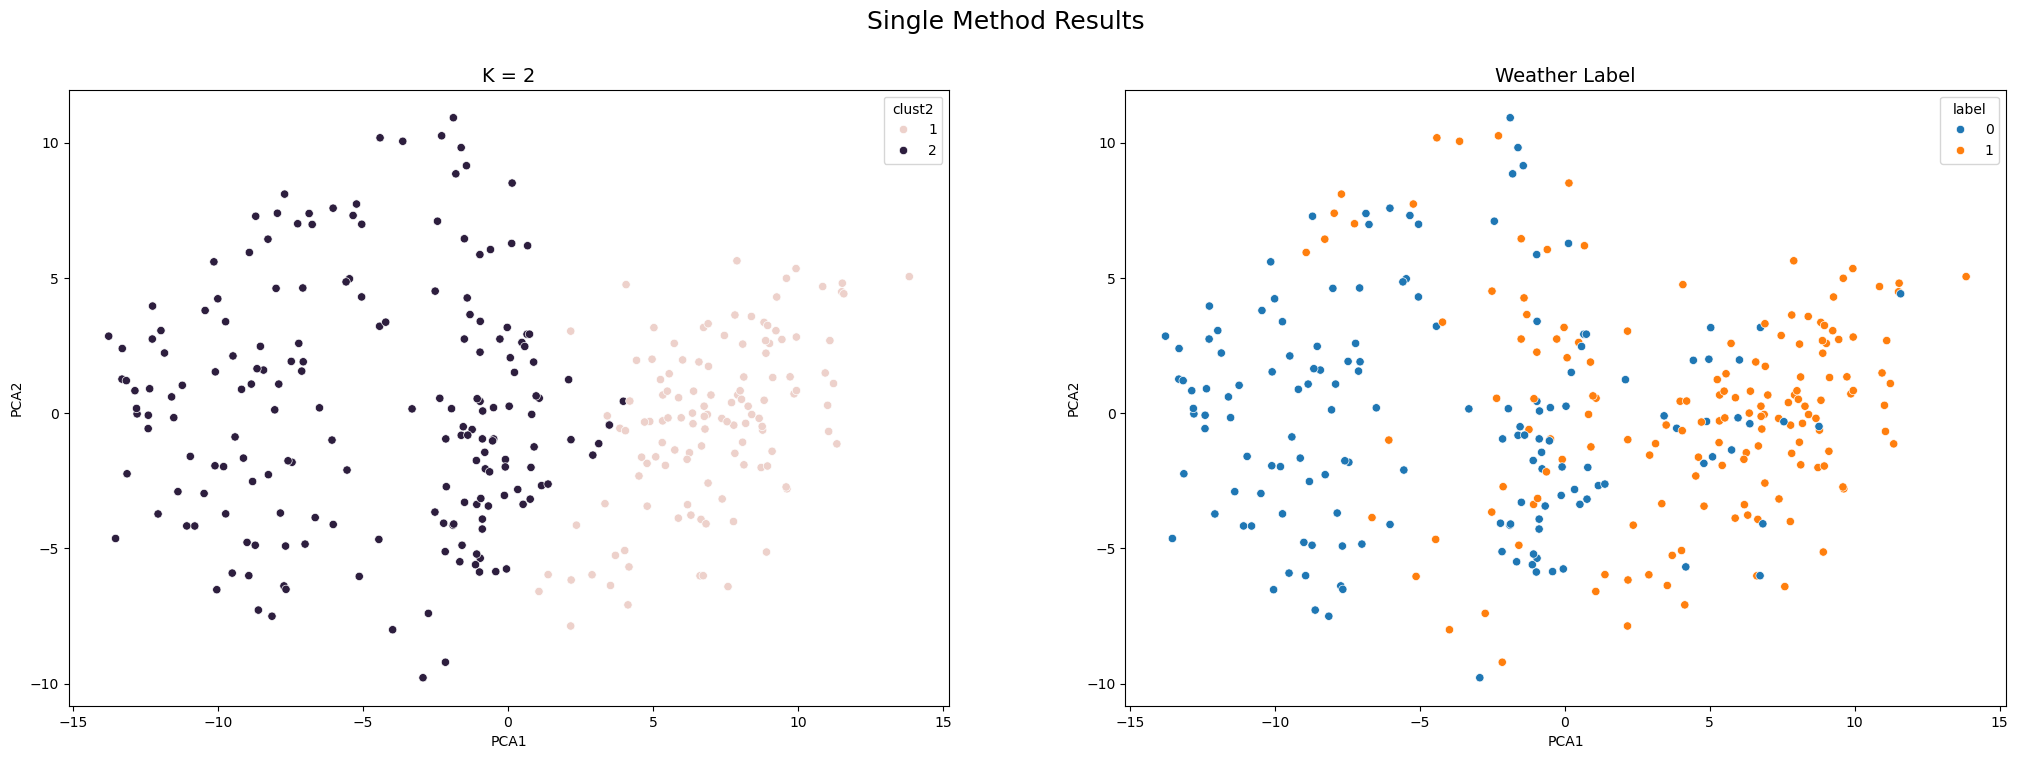

In [367]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Single Method Results",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=df_plot1, hue="clust2")

plt.subplot(1,2,2)
plt.title("Weather Label",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=df_plot1, hue="label")

plt.show()

In [368]:
df_plot1["adjusted_cluster"] = df_plot["clust2"].replace({2:0})

df_plot1

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,clust2,label,adjusted_cluster
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56,2,0,0
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71,2,0,0
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97,2,0,0
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07,2,0,0
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.79,-2.01,-3.94,-3.64,-2.41,-1.11,-1.88,0.16,0.33,2,0,0
300,1.15,-2.68,-3.82,-3.04,-2.54,-0.64,-2.77,1.10,0.42,2,0,0
301,1.38,-2.63,-3.44,-2.43,-2.52,0.64,-1.47,-0.08,0.76,2,0,0
302,-0.10,-1.99,-3.47,-2.44,-3.55,0.20,-0.97,0.71,0.72,2,0,0


In [369]:
df_plot1["accuracy"] = df_plot1["label"] == df_plot1["adjusted_cluster"]

df_plot1

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,clust2,label,adjusted_cluster,accuracy
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56,2,0,0,True
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71,2,0,0,True
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97,2,0,0,True
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07,2,0,0,True
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67,2,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.79,-2.01,-3.94,-3.64,-2.41,-1.11,-1.88,0.16,0.33,2,0,0,True
300,1.15,-2.68,-3.82,-3.04,-2.54,-0.64,-2.77,1.10,0.42,2,0,0,True
301,1.38,-2.63,-3.44,-2.43,-2.52,0.64,-1.47,-0.08,0.76,2,0,0,True
302,-0.10,-1.99,-3.47,-2.44,-3.55,0.20,-0.97,0.71,0.72,2,0,0,True


In [370]:
df_plot1["accuracy"].sum()/len(df_plot1)

0.7664473684210527

# STOCKHOLM_pleasant_weather cluster

In [372]:
# # Creating 2 Clusters
df_plot2=pca_weather_components_df.copy()

df_plot2['clust2']=fcluster(linked,2, criterion='maxclust')
df_plot2.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,clust2
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56,2
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71,2
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97,2
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07,2
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67,2


In [373]:
# Create label
df_plot2["label"] = answers["STOCKHOLM_pleasant_weather"]
df_plot2.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,clust2,label
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56,2,0
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71,2,0
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97,2,0
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07,2,0
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67,2,0


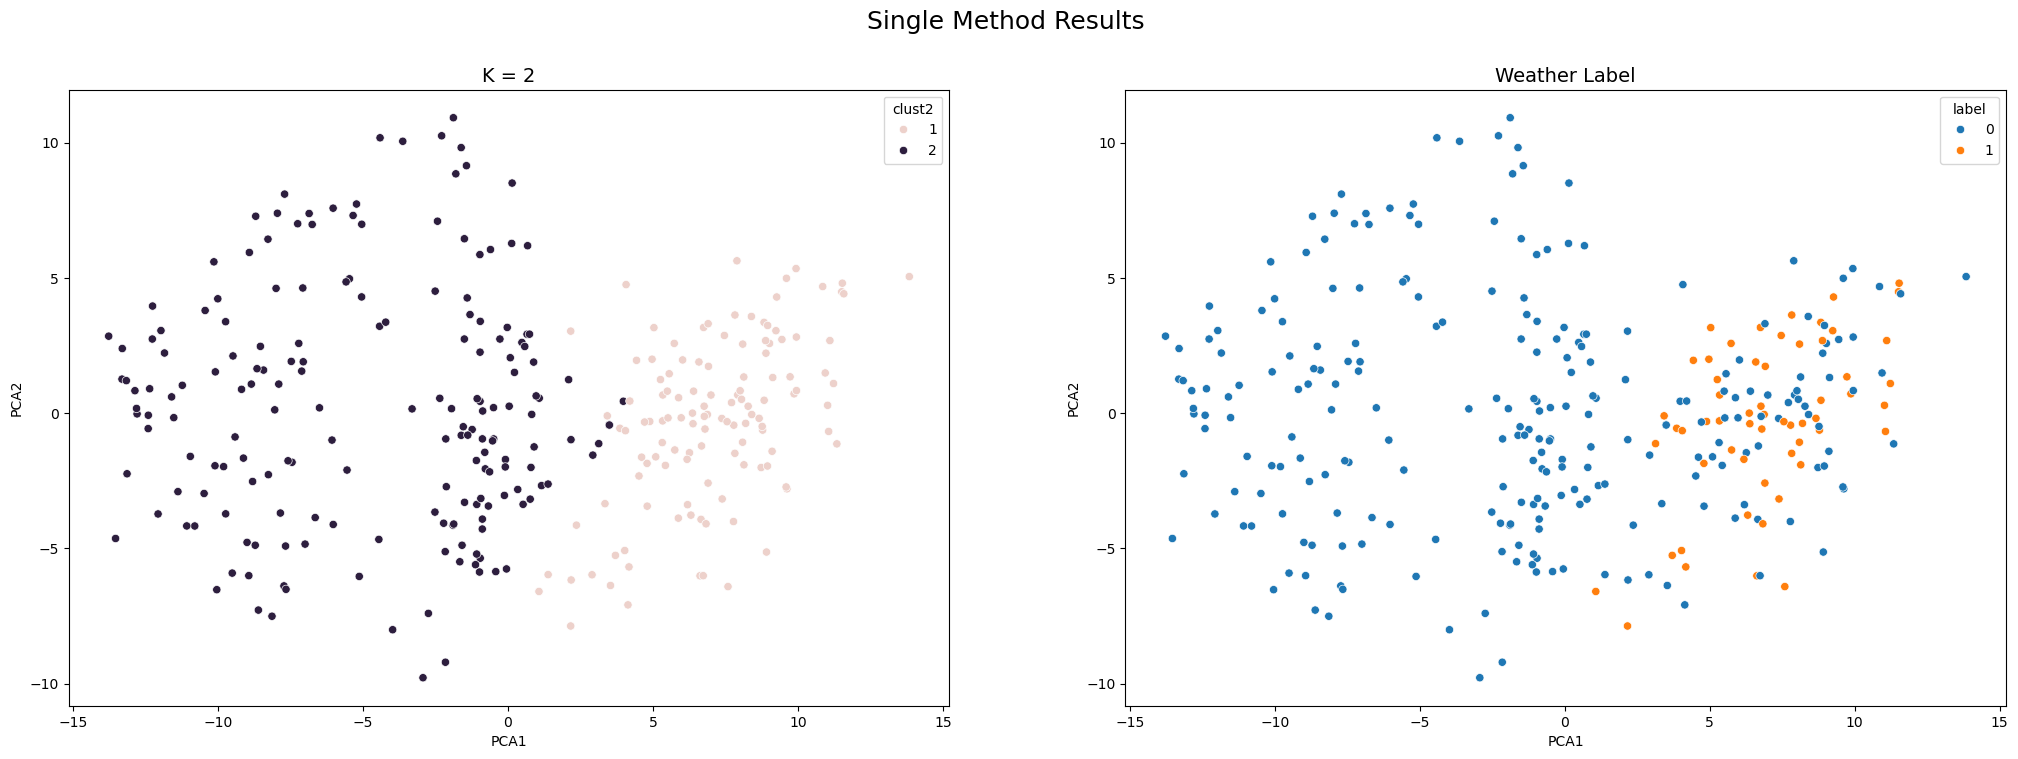

In [374]:
#plot the clusters against the answers
plt.figure(figsize=(25,8))

plt.suptitle("Single Method Results",fontsize=18)

plt.subplot(1,2,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=df_plot2, hue="clust2")

plt.subplot(1,2,2)
plt.title("Weather Label",fontsize=14)
sns.scatterplot(x="PCA1",y="PCA2", data=df_plot2, hue="label")

plt.show()

In [375]:
df_plot2["adjusted_cluster"] = df_plot2["clust2"].replace({2:0})

df_plot2

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,clust2,label,adjusted_cluster
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56,2,0,0
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71,2,0,0
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97,2,0,0
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07,2,0,0
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.79,-2.01,-3.94,-3.64,-2.41,-1.11,-1.88,0.16,0.33,2,0,0
300,1.15,-2.68,-3.82,-3.04,-2.54,-0.64,-2.77,1.10,0.42,2,0,0
301,1.38,-2.63,-3.44,-2.43,-2.52,0.64,-1.47,-0.08,0.76,2,0,0
302,-0.10,-1.99,-3.47,-2.44,-3.55,0.20,-0.97,0.71,0.72,2,0,0


In [376]:
df_plot2["accuracy"] = df_plot2["label"] == df_plot2["adjusted_cluster"]

df_plot2

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,clust2,label,adjusted_cluster,accuracy
0,-7.45,-1.82,-4.58,-2.46,-0.01,-2.36,0.15,-0.36,0.56,2,0,0,True
1,-7.67,-4.92,-1.86,-4.26,1.64,-0.80,-1.69,-0.92,2.71,2,0,0,True
2,-7.73,-6.39,0.10,-3.09,0.21,-1.07,-2.26,-0.00,1.97,2,0,0,True
3,-8.61,-7.29,3.50,-1.96,-2.18,0.40,0.14,-0.45,0.07,2,0,0,True
4,-10.81,-4.18,4.49,3.36,0.46,0.15,-2.11,-2.47,-2.67,2,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.79,-2.01,-3.94,-3.64,-2.41,-1.11,-1.88,0.16,0.33,2,0,0,True
300,1.15,-2.68,-3.82,-3.04,-2.54,-0.64,-2.77,1.10,0.42,2,0,0,True
301,1.38,-2.63,-3.44,-2.43,-2.52,0.64,-1.47,-0.08,0.76,2,0,0,True
302,-0.10,-1.99,-3.47,-2.44,-3.55,0.20,-0.97,0.71,0.72,2,0,0,True


In [377]:
df_plot2["accuracy"].sum()/len(df_plot2)

0.7828947368421053

#### LJUBLJANA has an accuaracy of 74.67% for pleasant weather.
#### Madrid has an accuaracy of 76.64% for pleasant weather. And
#### STOCKHOLM has an accuaracy of 78.28% for pleasant weather.